In [96]:
#import libraries
#loads state code dictionary for heatmaps  

import numpy as np
import pandas as pd
import hvplot.pandas
import sqlalchemy
from pathlib import Path
import plotly.express as px

code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}



#This block of code loads both the student population and school finance by state datasets.
#Pulls only 2016 finance data. adds population and revenue per capita rows.

#Student Population Data
student_pop = pd.read_csv(
    Path("../uncc_project1/other_datasets/pop_of_school_kids.csv"))

student_pop = student_pop.dropna()
student_pop.tail()

#School Finance Data

state_school_fin = pd.read_csv(
    Path("../uncc_project1/School_Data/states.csv"))

state_school_fin= state_school_fin.drop('ENROLL', axis=1)
state_school_fin=state_school_fin.drop('OTHER_EXPENDITURE', axis=1)

#SQL stuff to pull only 2016 data
database_connection_string = "sqlite://"
engine = sqlalchemy.create_engine(database_connection_string)

school_db=state_school_fin.to_sql('school_finances', engine, index=False, if_exists='replace')
query_states_2016 = """
SELECT * 
FROM school_finances
WHERE YEAR = 2016
"""

finance_2016=pd.read_sql_query(query_states_2016, con=engine)

#add student population row to finance dataframe 
finance_2016["student_population"] = student_pop["pop_2016"]

#creates revenue per capita row. replace "TOTAL_REVENUE" with a different metric to calculate
#that metric per capita. 
finance_2016["rev_per_capita"]=finance_2016["TOTAL_REVENUE"]/finance_2016["student_population"]

finance_2016.head()

,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,student_population,rev_per_capita
0,Alabama,2016,7498567,797631,4097696,2603240,7708845,3865453,2439634,610743,4860545.0,1.542742
1,Alaska,2016,2494691,307320,1613675,573696,2623014,1251738,983877,255041,741522.0,3.364285
2,Arizona,2016,8503034,1160908,3440726,3901400,7987011,3872250,2913176,528694,6908642.0,1.230782
3,Arkansas,2016,5401016,593656,4122377,684983,5434193,2658253,1802769,518181,2988231.0,1.807429
4,California,2016,89217262,7709079,50904567,30603616,85320133,42587272,26058021,6786142,39296476.0,2.270363


In [97]:
#creates dataframe of states
#can be used to append data to in order to simplify in code visuals 

state_list = []
state_list=pd.DataFrame(state_list)
state_list["STATE"]=finance_2016["STATE"]


In [98]:
state_list["state_revenue_per_capita"]= finance_2016["STATE_REVENUE"]/finance_2016["student_population"]

In [99]:
state_list.head()

,STATE,state_revenue_per_capita
0,Alabama,0.843053
1,Alaska,2.176166
2,Arizona,0.498032
3,Arkansas,1.379538
4,California,1.295398


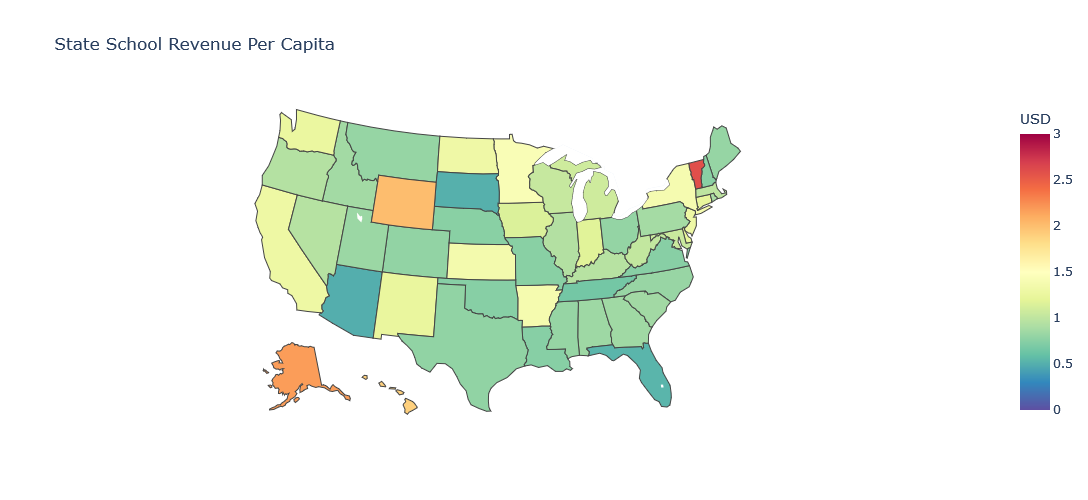

In [100]:
#state revenue per capita by state 

state_list['Code'] = state_list['STATE'].map(code)
fig = px.choropleth(state_list,
                    locations='Code',
                    color= state_list['state_revenue_per_capita'].astype(float),
                    color_continuous_scale='spectral_r',
                    hover_name='STATE',
                    range_color=[0,3],
                    locationmode='USA-states',
                    title="State School Revenue Per Capita",
                    scope='usa',
                    width=700,
                    height=500,
                   )
fig.update_layout(coloraxis_colorbar=dict(
    title="USD"))
fig= fig.update_layout(margin_l=5)
fig_finance_heat=fig.update_layout(margin_r=10)
fig_finance_heat

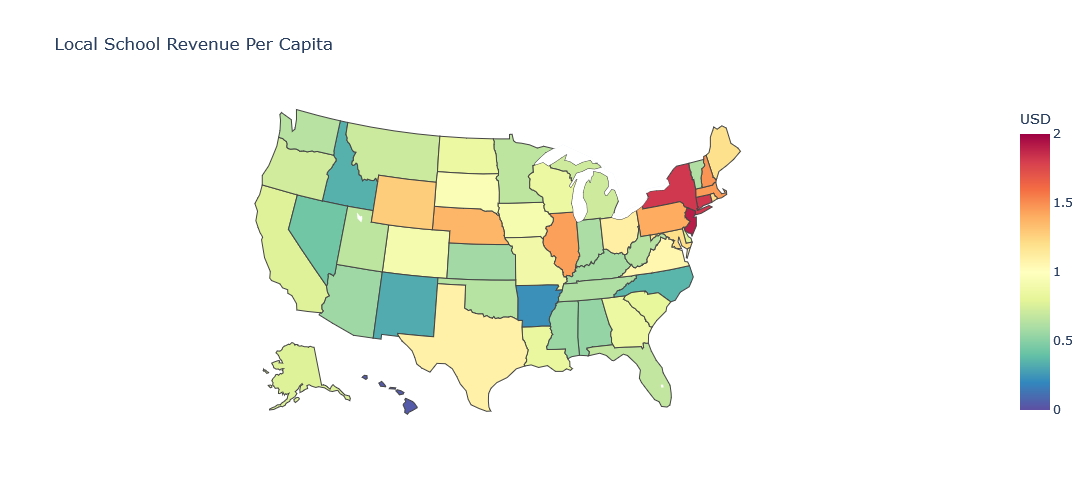

In [101]:
state_list["local_revenue_per_capita"]= finance_2016["LOCAL_REVENUE"]/finance_2016["student_population"]

state_list['Code'] = state_list['STATE'].map(code)
fig = px.choropleth(state_list,
                    locations='Code',
                    color= state_list['local_revenue_per_capita'].astype(float),
                    color_continuous_scale='spectral_r',
                    hover_name='STATE',
                    range_color=[0,2],
                    locationmode='USA-states',
                    title="Local School Revenue Per Capita",
                    scope='usa',
                    width=700,
                    height=500,
                   )
fig.update_layout(coloraxis_colorbar=dict(
    title="USD"))
fig= fig.update_layout(margin_l=5)
fig_finance_heat=fig.update_layout(margin_r=10)
fig_finance_heat

In [102]:
state_gdp_df= pd.read_csv(
    Path("../uncc_project1/other_datasets/SAGDP1__ALL_AREAS_1997_2020.csv"))


In [103]:
database_connection_string = "sqlite://"

engine = sqlalchemy.create_engine(database_connection_string)

engine

state_gdp_db=state_gdp_df.to_sql('state_gdp', engine, index=False, if_exists='replace')

In [104]:
engine.table_names()



C:\Users\Giselle\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SADeprecationWarning:

The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)



['state_gdp']

In [114]:
query= """
SELECT GeoName, usd_2016
FROM state_gdp 
WHERE SUBSTR(Description,1,8) = "Real GDP" 

"""




In [115]:
real_gdp= pd.read_sql_query(query,con=engine)

In [121]:
real_gdp.drop([0, 9, 52, 53, 54, 55, 56, 57, 58,59])

,GeoName,usd_2016
1,Alabama,194283.8
2,Alaska,54246.6
3,Arizona,291275.2
4,Arkansas,112798.1
5,California,2427894.6
6,Colorado,318953.4
7,Connecticut,243286.7
8,Delaware,63001.3
10,Florida,881539.2
11,Georgia,506816.2
